<div style="text-align: right"> CS824 - Lab 6b (2022) </div>

# Using NumPy arrays to work with vectors

A 1-D array can be thought of as a vector, while 2-D arrays are now the preferred way in Python of carrying out operations involving matrices (i.e. there is no real need to use the `matrix` data type)...

Remember that a vector is just a tuple of (typically two or more) scalar values.

So we might have a vector `v` made up of (s1, s2, s3) - i.e. 3 scalar values (often integers or reals).


In [2]:
# However, this is NOT the same as a tuple or even a list in Python - we explictly need to specify the 
# variable as being of type array

import numpy as np
import matplotlib.pyplot as plt

v1 = (2, 4, 7)
print(v1)
print(type(v1))

v2 = ([2, 4, 7])
print(v2)
print(type(v2))

v3 = np.array([2, 4, 7])
print(v3)
print(type(v3))


(2, 4, 7)
<class 'tuple'>
[2, 4, 7]
<class 'list'>
[2 4 7]
<class 'numpy.ndarray'>


While these may look similar they are in fact quite different sorts of objects as you can see by executing the *magic* `%whos` command.


In [3]:
%whos

Variable   Type       Data/Info
-------------------------------
np         module     <module 'numpy' from 'c:\<...>ges\\numpy\\__init__.py'>
os         module     <module 'os' from 'c:\\Us<...>envs\\myenv\\lib\\os.py'>
plt        module     <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sys        module     <module 'sys' (built-in)>
v1         tuple      n=3
v2         list       n=3
v3         ndarray    3: 3 elems, type `int32`, 12 bytes


## Exercise 6b1

Create two simple 2-D vectors `a` = (4, 1) and `b` = (2, 2).

(Remember to construct these as NumPy arrays - if you simple create 2 lists they will not 'behave' as you should expect from vector algebra.)

 - add these vectors together
 - multiply them by various scalar values (positive and negative)

Do the resulting vectors 'make sense' to you...


In [4]:
a = np.array([4, 1])
b = np.array([2, 2])

print(a+b)
print(a * -4)
print(b * 5)

[6 3]
[-16  -4]
[10 10]


## Visualising arrays with 2 elements in x-y Euclidean space

As mentioned in the mini-lectures it is often useful to think of vectors as arrows pointing into space (the 'physicists' view), which allows for various **geometric** interpretations. In the case of a 1-D array with two elements this would be in 2-D space (i.e. typically `x-y` Euclidean space). A 1-D array with three elements would represent points in 3-D space (typically visualised as `x-y-z` space). A 1-D array with four elements moves us into 4-D space, but for >3-D space we have some trouble coming up with simple visualisations!

In any case, sticking to the simple 2-D case - i.e. a 1-D array with two elements, such as the examples above - we can have a shot at visualising these.  

However, unlike graphics such as scatterplots or histograms, visualising vectors is not that straighforward in Python. Some of you may disagree and/or prove me wrong but I have not found a simple approach. There is a **pyGame** library that may make things easier, but I have not had time to explore it properly. So the solution below feels a bit 'clunky' and seems like a lot of work just to show 3 lines, but using the `quiver` plot was the best option I could come up with (that did not involve explitly finding the end points of each line and specifying that).


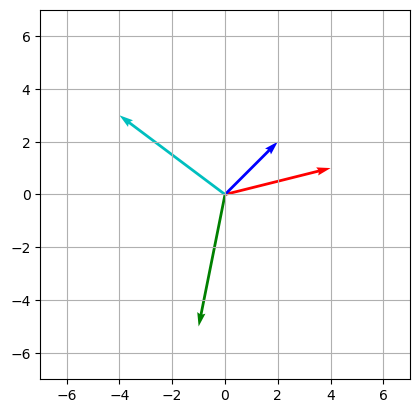

In [20]:
Vectors = np.array([[4,1],[2,2],[-1,-5],[-4, 3]])

# This specifies a list of three vectors, including the two you created in Exercise 6b1.               

x_org = np.array((0,0,0,0))           # specify the x-origin point
y_org = np.array((0,0,0,0))           # specify the y-origin point  

fig, ax = plt.subplots()
q = ax.quiver(x_org, y_org, Vectors[:,0], Vectors[:,1], color=['r','b','g', 'c'], units='xy' ,scale=1)

# Just to make things look a bit 'nicer'
plt.grid()
ax.set_aspect('equal')
plt.xlim(-7,7)
plt.ylim(-7,7)


plt.show()


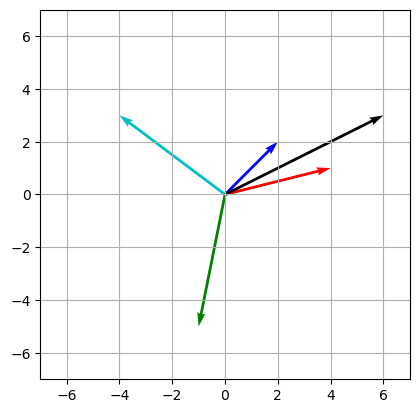

In [22]:
x_org2 = np.array((0))           # specify the x-origin point
y_org2 = np.array((0))           # specify the y-origin point

fig, ax = plt.subplots()
q = ax.quiver(x_org, y_org, Vectors[:,0], Vectors[:,1], color=['r','b','g', 'c'], units='xy' ,scale=1)

# Just to make things look a bit 'nicer'
plt.grid()
ax.set_aspect('equal')
plt.xlim(-7,7)
plt.ylim(-7,7)


# We can now look at adding the vectors [A] and [B] and see what this looks like on the graph.
c = Vectors[0] + Vectors[1]

plt.quiver(x_org2, y_org2, c[0], c[1], color=['k'], units='xy' ,scale=1)

plt.show()


In [23]:
c

array([6, 3])

I did warn you that drawing vectors in Python can be a bit more tricky than simply using pen and paper!!

You may choose to check out any of the other transformations below visually by modifying the Python code above, or you might just trust your maths and/or sketch things out with pen and paper ;- )


In [24]:
# Below we move 3 times in direction [a] (12, 3) and then 2 times in direction [b] (4, 4), taking us to (16, 7)
d = 3*a + 2*b
# or 3*Vectors[0] + 2*Vectors[1] 
print(d)

# Move negative 0.5 times in direction [a] (-2, -0.5)  then 3 times in direction [b] (6, 6), taking us to (4, 5.5)
e = -0.5*a + 3*b
print(e)

# And if we made that move from the location we had reached at 'd', we would arrive at (20, 12.5)
f = d + (-0.5*a + 3*b)
f2 = (d -0.5*a) + 3*b         # NB vector addition is associative
print(f)
print(f2)


[16  7]
[4.  5.5]
[20.  12.5]
[20.  12.5]


## Exercise 6b2

Let's say we have the minimum and maximum temperatures (in Celsius) for seven days in Glasgow as follows:
 - Min = 9.5, 13, 12, 15, 11, 10, 12.5
 - Max = 22, 24, 19.5, 26, 23, 22.5, 27
 
We should create two 1-D vectors of length 7 to represent these values.
(You could also create a single 2-D vector with 2 rows and 7 columns, but this may be a bit more tricky to manage if you are just starting with arrays/vectors.)

1. Use vector substraction to produce an array showing the temperature differences over these 7 days.
2. Let's say we have a friend from the US and we want to let them know the maximum temperatures in Fahrenheit.
> The rough formula to get a Celsius value from Fahrenheit is:  C = 5/9 * (F - 32)
3. Now also let your US friend get a sense of the daily temperature differences in Fahrenheit. 


In [25]:
min_temp = np.array([9.5, 13, 12, 15, 11, 10, 12.5])
max_temp = np.array([22, 24, 19.5, 26, 23, 22.5, 27])

In [26]:
# 1. Use vector substraction to produce an array showing the temperature differences over these 7 days.
temp_diff = max_temp - min_temp
temp_diff

array([12.5, 11. ,  7.5, 11. , 12. , 12.5, 14.5])

In [29]:
# 1. Let's say we have a friend from the US and we want to let them know the maximum temperatures in Fahrenheit.
max_temp_inFar = (max_temp * (9/5)) + 32
max_temp_inFar

array([71.6, 75.2, 67.1, 78.8, 73.4, 72.5, 80.6])

In [30]:
# 3. Now also let your US friend get a sense of the daily temperature differences in Fahrenheit.
temp_diff_inFar = (temp_diff * (9/5)) + 32
temp_diff_inFar

array([54.5, 51.8, 45.5, 51.8, 53.6, 54.5, 58.1])

## The 'dot' product for vectors

Often in linear algebra we wish to look at the 'dot' product of two vectors, rather than just multiplying them element-wise.

To do this we use the `dot` function from NumPy.


## Exercise 6b3

Check out the dot product between your two vectors `a` = (4, 1) and `b` = (2, 2).

 - was this the value you expected?
 - generate a dot product with `a` for a vector that points in a different (opposing) direction (For example, `Vectors[2]` in the example above.)
 - can you use the dot product to check that some new vector you create is 'orthogonal' (at right angles to) `a`?


In [31]:
np.dot(a, b)

10

In [32]:
np.dot(Vectors[0], Vectors[2])

-9

In [34]:
# Two non-zero vectors are said to be orthogonal when (if and only if) their dot product is zero.
np.dot(Vectors[0], [-1, 4])
# The new vector is orthogonal to vector a(4, 1)
# Asits dot product is equal to 0

0

## The 'dot' product and angles between vectors

In class we noted that there was also a formula for find `theta` the angle between 2 vectors as follows:

> Cos(`theta`) = `a` dot `b` /|`a`| * |`b`|

Use this to find the size of the angle between two of the vectors we have been working with...


In [35]:
import math

a_magn = math.sqrt((a[0])**2 + (a[1])**2)
b_magn = math.sqrt((b[0])**2 + (b[1])**2)

cos_of_angle = np.dot(a, b) /(a_magn * b_magn)
# The inverse of cos so that, if y = cos(x), then x = arccos(y).
angle = np.arccos(cos_of_angle)
print(angle)

# The defualt is radians, but we will convert to the more 'typical' way of thinking in terms of degrees below...


0.5404195002705844


## Using `norm` to calculate magnitudes (in Euclidean space)

In the example about calculated the magnitude to `a` and `b` using Euclidean goemetry and would have to modify our function to deal with vectors in higher than two dimensional space. However, using the `norm` vector operator from NumPy we could get these magnitude values directly and these hold for any number of dimensions. 

The '2-norm' (i.e. the most common Euclidean goemetry, also known as the 'Frobenius' norm) is the default...


In [36]:
from numpy import linalg as LA      # just one more Pythonic 'convention'  (obviously you could use the long-hand)

cos_of_angle2 = np.dot(a, b) /(LA.norm(a) * LA.norm(b))
angle2 = np.arccos(cos_of_angle2)
print("The angle is radians is: {0:.3f}".format(angle2))
print("The angle is degrees is: {0:.1f}".format(np.degrees(angle2)))       # for those less familar with radians


The angle is radians is: 0.540
The angle is degrees is: 31.0


In [37]:
# Looking at the first and third members of our 'Vectors[]' above they are clearly at more
# than right angles apart, but what is the size of this angle?

cos_of_angle3 = np.dot(Vectors[0], Vectors[2]) /(LA.norm(Vectors[0]) * LA.norm(Vectors[2]))
angle3 = np.arccos(cos_of_angle3)
print("The angle is radians is: {0:.3f}".format(angle3))
print("The angle is degrees is: {0:.1f}".format(np.degrees(angle3)))       # for those less familar with radians


The angle is radians is: 2.013
The angle is degrees is: 115.3


## Exercise 6b4

Use this approach to explore the angles between some of the vectors that you compared with `a` and `b` above

 - including those that pointed in a different (opposing) direction 
 - and those that were 'orthogonal' (at right angles to) `a`?


In [38]:
cos_of_angle4 = np.dot(Vectors[0], [-1, 4]) / LA.norm(Vectors[0] * LA.norm([-1, 4]))
angle4 = np.arccos(cos_of_angle4)
print("The angle is radians is: {0:.3f}".format(angle4))
print("The angle is degrees is: {0:.1f}".format(np.degrees(angle4)))       # for those less familar with radians

The angle is radians is: 1.571
The angle is degrees is: 90.0


In [39]:
cos_of_angle5 = np.dot(Vectors[0], [-4, -1]) / LA.norm(Vectors[0] * LA.norm([-4, -1]))
angle5 = np.arccos(cos_of_angle5)
print("The angle is radians is: {0:.3f}".format(angle5))
print("The angle is degrees is: {0:.1f}".format(np.degrees(angle5)))       # for those less familar with radians

The angle is radians is: 3.142
The angle is degrees is: 180.0


## Other values of `norm` when thinking about magnitude

By far the most common measure of magnitude is the Euclidean one (i.e. `norm` = 2), particularly in 2-D and 3-D space. However, there are many other ways to measure the magnitude of a vector, with the other most commonly used ones arguably being the 1-norm (sometimes referred to as the 'Manhattan'/'taxi-cab' distance) and the infinity-norm.

You could look at the values of these for our `a` and `b` vectors (or any others you are interested in) to get a better sense for what the notion of `norm` means. 


In [40]:
# The 1-norm, 2-norm and infinity-norm cases

magn1_a = LA.norm(a, ord=1)
magn2_a = LA.norm(a)                        # An ord=2 is implied by default
magn_inf_a = LA.norm(a, ord=np.inf)
magn1_b = LA.norm(b, ord=1)
magn2_b = LA.norm(b)
magn_inf_b = LA.norm(b, ord=np.inf)

print("For array {0} we get the following:".format(a))
print("The 1-norm magnitude is: {0:.1f}".format(magn1_a))
print("The 2-norm magnitude is: {0:.3f}".format(magn2_a))
print("The infinity-norm magnitude is: {0:.1f}".format(magn_inf_a))
print("------------------------------")
print("For array {0} we get the following:".format(b))
print("The 1-norm magnitude is: {0:.1f}".format(magn1_b))
print("The 2-norm magnitude is: {0:.3f}".format(magn2_b))
print("The infinity-norm magnitude is: {0:.1f}".format(magn_inf_b))


For array [4 1] we get the following:
The 1-norm magnitude is: 5.0
The 2-norm magnitude is: 4.123
The infinity-norm magnitude is: 4.0
------------------------------
For array [2 2] we get the following:
The 1-norm magnitude is: 4.0
The 2-norm magnitude is: 2.828
The infinity-norm magnitude is: 2.0


Enough for the moment on vectors...  we will now look at their relationships to matrices (**Lab_6c**)...
